# ONS Data Regression Plot

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
import numpy as np
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
ons_data = pd.read_csv('../data/ons_filtered.csv')

In [50]:
ons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year_quarter           64 non-null     object 
 1   gdp_(£m)               64 non-null     float64
 2   unemployment_rate_(%)  64 non-null     float64
 3   inflation_(%)          64 non-null     float64
 4   hfce_(£m)              64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.6+ KB


In [10]:
ons_data.describe()

,gdp_(£m),unemployment_rate_(%),inflation_(%),hfce_(£m)
count,64.000000,64.000000,64.000000,64.000000
mean,577804.546875,5.576562,2.754688,354006.015625
std,44429.748922,1.653255,2.078074,28089.972712
min,481769.000000,3.700000,0.300000,286546.000000
25%,536587.000000,4.175000,1.575000,325443.750000
50%,579089.000000,4.900000,2.350000,359077.000000
75%,615807.500000,7.725000,2.950000,381054.750000
max,642287.000000,8.400000,9.400000,389410.000000


In [11]:
ons_data.head(10)

,year_quarter,gdp_(£m),unemployment_rate_(%),inflation_(%),hfce_(£m)
0,2009 Q1,509646.0,7.1,2.9,312387.0
1,2009 Q2,508009.0,7.8,2.0,311964.0
2,2009 Q3,508398.0,7.8,1.4,313410.0
3,2009 Q4,509889.0,7.8,1.6,315889.0
4,2010 Q1,514595.0,8.0,2.4,314367.0
5,2010 Q2,520128.0,7.9,2.5,322185.0
6,2010 Q3,523173.0,7.8,2.3,322411.0
7,2010 Q4,523515.0,7.9,2.7,321985.0
8,2011 Q1,524955.0,7.8,3.5,319260.0
9,2011 Q2,525418.0,7.9,3.8,317978.0


In [9]:
ons_data.drop('Unnamed: 0', axis='columns', inplace=True)

In [11]:
ons_data.to_csv('data/ONS/ons_filtered.csv')

# Regression Plots
#### Comparing correlation between macroeconomic data

(2.0, 10.211971762262774)

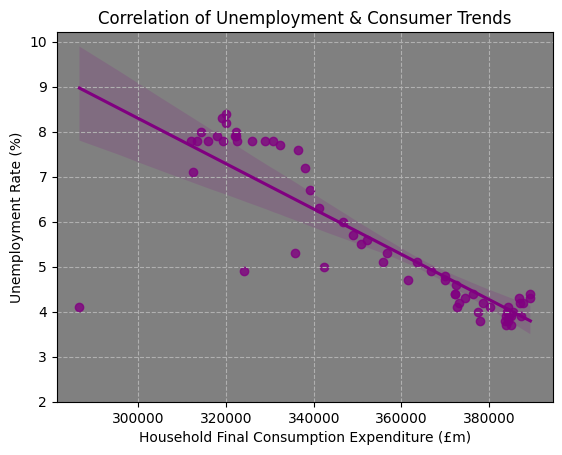

In [16]:
sns.regplot(
    x="hfce_(£m)", 
    y="unemployment_rate_(%)", 
    data=ons_data,
    color='purple'
)

ax = plt.gca()
ax.set_facecolor("grey")
plt.title('Correlation of Unemployment & Consumer Trends')
plt.xlabel('Household Final Consumption Expenditure (£m)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(linestyle='--')
plt.ylim(2,)


#### The above plot below shows a correlation with HFCE(Consumer Trends/Confidence) and Unemployment although there is a visible curve which would suggest polynomial regression would be better suited for this plot.

#### I would also like to look into the outliers on this graph and the reasoning behind this.

(2.0, 10.0)

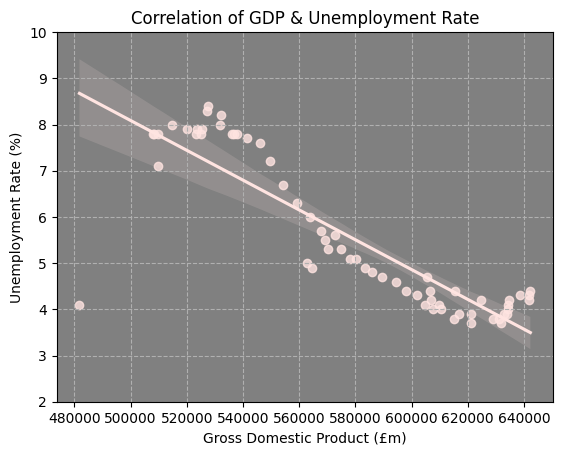

In [17]:
sns.regplot(
    x="gdp_(£m)", 
    y="unemployment_rate_(%)", 
    data=ons_data,
    color='mistyrose')

ax = plt.gca()
ax.set_facecolor("grey")
plt.title('Correlation of GDP & Unemployment Rate')
plt.xlabel('Gross Domestic Product (£m)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(linestyle='--')
plt.ylim(2,10)


#### The above plot below shows a correlation with GDP and Unemployment although there is a visible curve which would suggest polynomial regression would be better suited for this plot.

#### I would also like to look into the outliers on this graph and the reasoning behind this.

(0.0, 9.880839489709091)

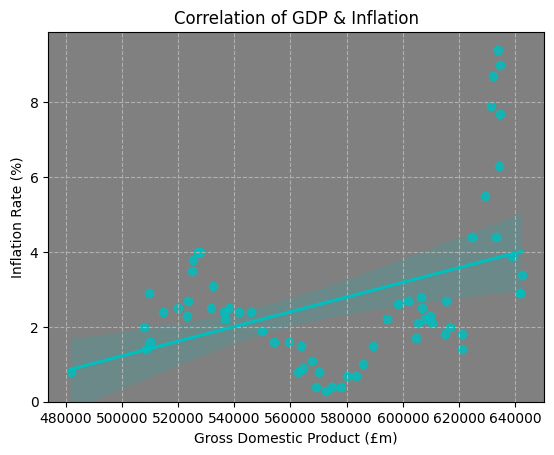

In [19]:
sns.regplot(
    x="gdp_(£m)", 
    y="inflation_(%)", 
    data=ons_data,
    color='c')

ax = plt.gca()
ax.set_facecolor("grey")
plt.title('Correlation of GDP & Inflation')
plt.xlabel('Gross Domestic Product (£m)')
plt.ylabel('Inflation Rate (%)')
plt.grid(linestyle='--')
plt.ylim(0,)


#### The above plot shows very little correlation between GDP and inflation

(0.0, 9.87388007076019)

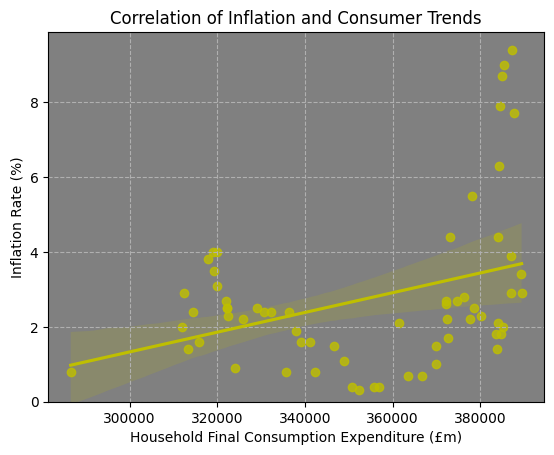

In [20]:
sns.regplot(
    x="hfce_(£m)", 
    y="inflation_(%)", 
    data=ons_data,
    color='y')

ax = plt.gca() 
ax.set_facecolor("grey")
plt.title('Correlation of Inflation and Consumer Trends')
plt.xlabel('Household Final Consumption Expenditure (£m)')
plt.ylabel('Inflation Rate (%)')
plt.grid(linestyle='--')
plt.ylim(0,)

#### The above plot shows very little correlation between FHCE and CPIH (inflation)

(260000.0, 401966.20526385645)

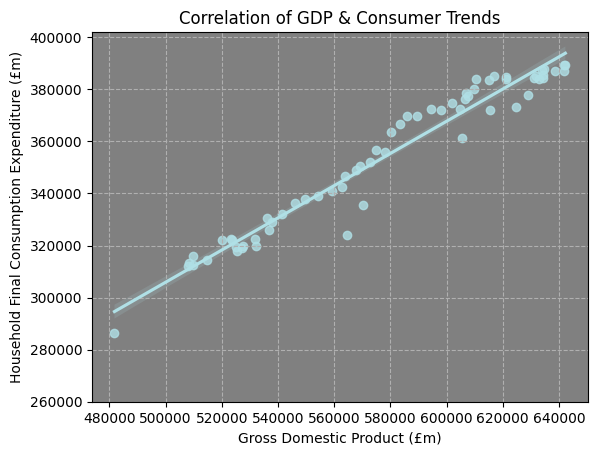

In [23]:
sns.regplot(
    x="gdp_(£m)", 
    y="hfce_(£m)", 
    data=ons_data,
    color='powderblue')

ax = plt.gca() 
ax.set_facecolor("grey")
plt.title('Correlation of GDP & Consumer Trends')
plt.xlabel('Gross Domestic Product (£m)')
plt.ylabel('Household Final Consumption Expenditure (£m)')
plt.grid(linestyle='--')
# plt.style.use('dark_background')
plt.ylim(260000,)


#### The above plot shows strong correlation between GDP and HFCE (consumer confidence/trends)

#### This intercorrelation could impact analysis results 

#### I'd like to look at slices of this data and take a deeper dive into the nuances 

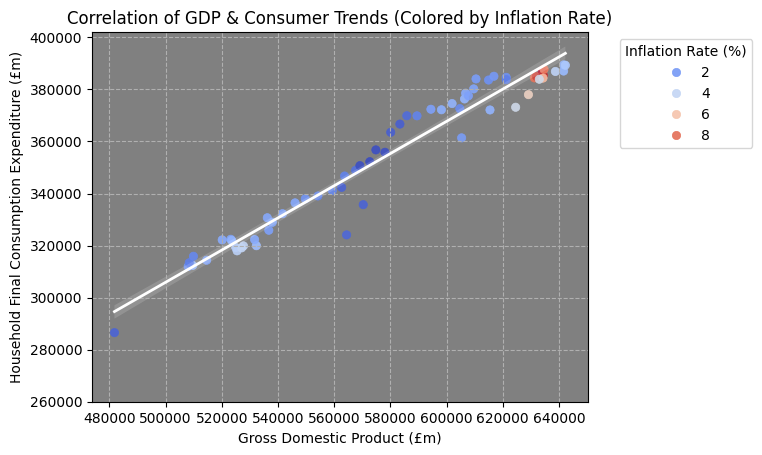

In [25]:
sns.scatterplot(
    x="gdp_(£m)",
    y="hfce_(£m)",
    hue="inflation_(%)",  
    palette="coolwarm",  
    data=ons_data,
    edgecolor=None,
    alpha=0.9
)


sns.regplot(
    x="gdp_(£m)", 
    y="hfce_(£m)", 
    data=ons_data,
    scatter=False,  
    color='white',
    line_kws={'linewidth': 2}
)


ax = plt.gca()
ax.set_facecolor("grey")
plt.title('Correlation of GDP & Consumer Trends (Colored by Inflation Rate)')
plt.xlabel('Gross Domestic Product (£m)')
plt.ylabel('Household Final Consumption Expenditure (£m)')
plt.grid(linestyle='--')
plt.ylim(260000,)
plt.legend(title='Inflation Rate (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
plt.show()


#### The above regression plot is showing the correlation of GDP and HFCE (consumer trends/confidence). The colour gradiant of the scatter plot represents inflation at that time. There is no clear pattern between inflation and the correlation of GDP and Consumer trends/ confidence

#### What I would like to dive deeper into is the 'outliers' on this plot which I will look at below 

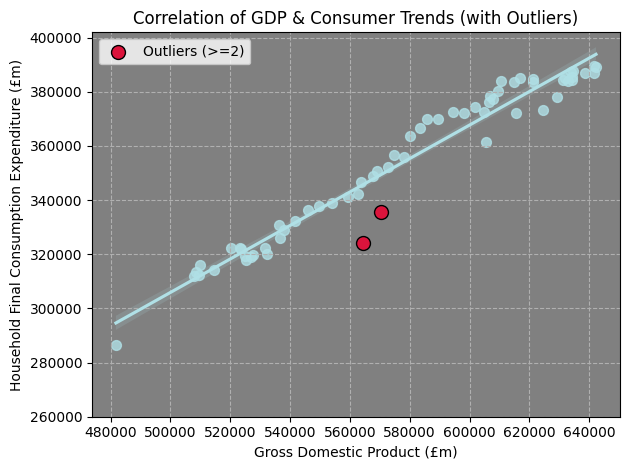

In [29]:
sns.regplot(
    x="gdp_(£m)", 
    y="hfce_(£m)", 
    data=ons_data,
    color='powderblue',
    scatter_kws={'s': 50}
)


outliers = ons_data[ons_data['Outlier']]
plt.scatter(
    outliers["gdp_(£m)"],
    outliers["hfce_(£m)"],
    color='crimson',
    edgecolor='black',
    s=100,
    label='Outliers (>=2)'
)

# outliers = ons_data[ons_data['Outlier2']]
# plt.scatter(
#     outliers["Gross Domestic Product (£m)"],
#     outliers["Household Final Consumption Expenditure (£m)"],
#     color='darkblue',
#     edgecolor='black',
#     s=100,
#     label='Outliers2'
# )


ax = plt.gca()
ax.set_facecolor("grey")
plt.title('Correlation of GDP & Consumer Trends (with Outliers)')
plt.xlabel('Gross Domestic Product (£m)')
plt.ylabel('Household Final Consumption Expenditure (£m)')
plt.grid(linestyle='--')
plt.ylim(260000,)
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
ons_data[ons_data['Outlier']]

,year_quarter,gdp_(£m),unemployment_rate_(%),inflation_(%),hfce_(£m),Residual,Z_Score,Outlier
47,2020 Q4,570338.0,5.3,0.8,335721.0,-13668.902690,-2.344066,True
48,2021 Q1,564411.0,4.9,0.9,324105.0,-21620.598182,-3.707694,True


#### In the above plot I have highlighted the outliers with a z-score greater than 2

#### A z-score greater than 2 is typically considered an outlier, indicating that the point is more than 2 standard deviations away from the regression line.

#### Below is a view of the outlier datapoints:
- Residuals are the differences between observed and predicted values.
- Z-scores are standardized residuals, showing how far away each residual is from the mean residual, in terms of standard deviations

#### The two outliers were from COVID during the winter lockdown. 



<img src="data/ONS.png" style="width: 600px">



#### From analysing the data, the two outliers were after the initial lockdown when both GDP and HFCE decreased simultaneously as you'd expect in 2020 Q4/2021 Q1 GDP increased in line with prior quarters where HFCE did not. This could be down to a number of reasons:
- GDP includes government spending (vaccines/furlough etc)
- After the initial lockdown and freeze on all production, manufacturing restarted in the later quarters of 2020.
- Although total GDP increased people still could not go out in 2020 Q4/2021 Q1 with hospitality and entertainment venues closed and travel prohibited people were unable to spend even if they wanted to.
- Even though production resumed resulting in increased GDP, there was a backlog and shortage of many products so many customers were unable to buy the products they wanted.

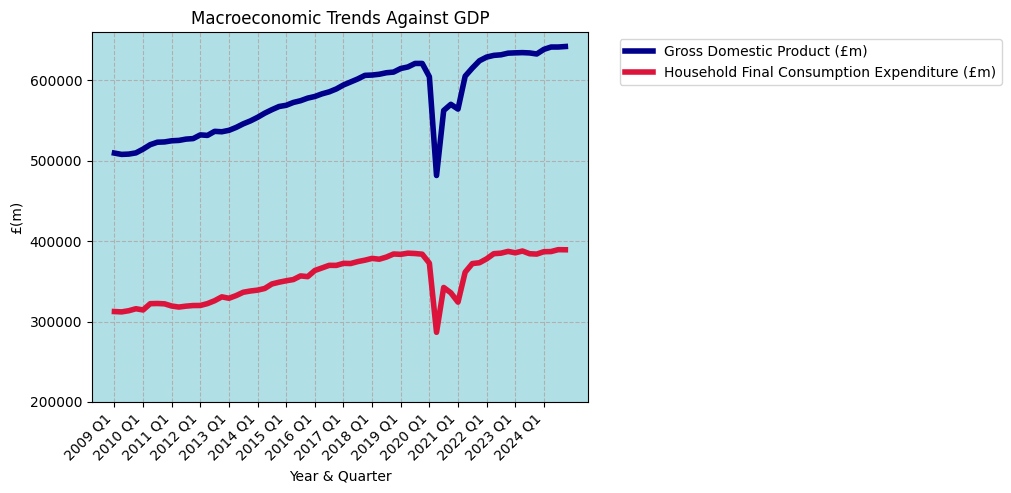

In [35]:
x = ons_data['year_quarter']
y = ['gdp_(£m)', 'hfce_(£m)']

colors = ['darkblue', 'crimson']

label_map = {
    'gdp_(£m)': 'Gross Domestic Product (£m)',
    'hfce_(£m)': 'Household Final Consumption Expenditure (£m)'
}

for var_name, color in zip(y, colors):
    plt.plot(x, ons_data[var_name], label=label_map[var_name], linewidth=4, color=color)

# for i in y:
#     plt.plot(x,ons_data[i], label=i, linewidth=4) # if removing the colours, use this line of code

# for var_name, color in zip(y, colors):
#     plt.plot(x, ons_data[var_name], label=var_name, linewidth=4, color=color) # if removing custom legend titles use this code 

ax = plt.gca() 
ax.set_facecolor("powderblue")
plt.title('Macroeconomic Trends Against GDP')
plt.ylabel('£(m)')
plt.xlabel('Year & Quarter')
# plt.figure(figsize=(10,6))

xtick_spacing = 4  # showing every 1st quarter 
plt.xticks(ticks=range(0, len(x), xtick_spacing), labels=x[::xtick_spacing], rotation=45, ha='right')
# plt.xticks(ticks=x[::xtick_spacing], labels=x[::xtick_spacing], rotation=45, ha='right') # if removing the colours, use this line of code
# plt.xticks(x, rotation=45, ha='right')
# plt.xticks(x)
plt.ylim(200000,)
plt.grid(linestyle='--')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Looking at GDP & HFCE further the above plot shows strong intercorrelation between these two metrics. (I had to plot only the first quarter so the year and quarter were readable). This could impact our analysis especially when using statistical models like regression 

#### These two metrics could be combined and we may be able to use one to represent the other to simplify our model without significant loss of information. 

#### So for looking at the impact of economic growth on consumer spending, being able to replace HFCE with GDP as a measure of the economy's overall performance.

In [36]:
ons_data.columns

Index(['year_quarter', 'gdp_(£m)', 'unemployment_rate_(%)', 'inflation_(%)',
       'hfce_(£m)', 'Residual', 'Z_Score', 'Outlier'],
      dtype='object')

In [37]:
X = ons_data[['gdp_(£m)']].values
y = ons_data['hfce_(£m)'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


residuals = y - y_pred
z_scores = zscore(residuals)  


ons_data['Residual'] = residuals
ons_data['Z_Score'] = z_scores


threshold1 = 2.0
threshold2 = 1.0

ons_data['Outlier1'] = np.abs(z_scores) > threshold1
ons_data['Outlier2'] = (np.abs(z_scores) > threshold2) & (np.abs(z_scores) <= threshold1)

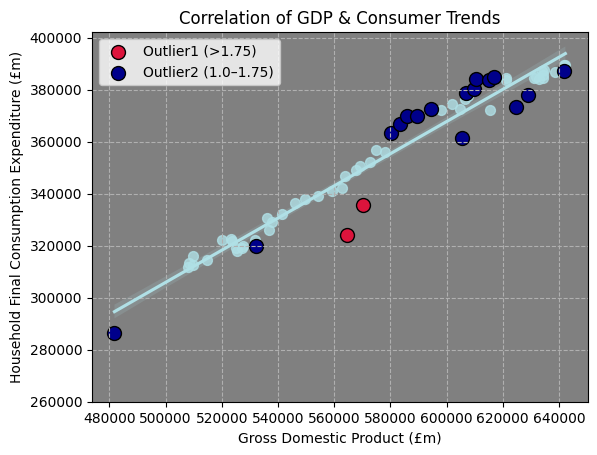

In [39]:
ax = plt.gca()
ax.set_facecolor("grey")

sns.regplot(
    x="gdp_(£m)", 
    y="hfce_(£m)", 
    data=ons_data,
    color='powderblue',
    scatter_kws={'s': 50}
)

outlier1 = ons_data[ons_data['Outlier1']]
plt.scatter(
    outlier1["gdp_(£m)"], 
    outlier1["hfce_(£m)"],
    color='crimson', label='Outlier1 (>1.75)', s=100, edgecolor='black')


outlier2 = ons_data[ons_data['Outlier2']]
plt.scatter(
    outlier2["gdp_(£m)"], 
    outlier2["hfce_(£m)"],
    color='darkblue', label='Outlier2 (1.0–1.75)', s=100, edgecolor='black')


plt.title('Correlation of GDP & Consumer Trends')
plt.xlabel('Gross Domestic Product (£m)')
plt.ylabel('Household Final Consumption Expenditure (£m)')
plt.grid(linestyle='--')
plt.ylim(260000,)
plt.legend()
plt.show()

In [40]:
ons_data.loc[ons_data['Outlier1'] & ons_data['Outlier2']]

,year_quarter,gdp_(£m),unemployment_rate_(%),inflation_(%),hfce_(£m),Residual,Z_Score,Outlier,Outlier1,Outlier2


In [48]:
ons_data.to_csv('data/ons_z_score.csv', index=False)

In [51]:
ons_data.corr()

,gdp_(£m),unemployment_rate_(%),inflation_(%),hfce_(£m)
gdp_(£m),1.000000,-0.866890,0.420430,0.977866
unemployment_rate_(%),-0.866890,1.000000,-0.217093,-0.854544
inflation_(%),0.420430,-0.217093,1.000000,0.356375
hfce_(£m),0.977866,-0.854544,0.356375,1.000000


<Axes: >

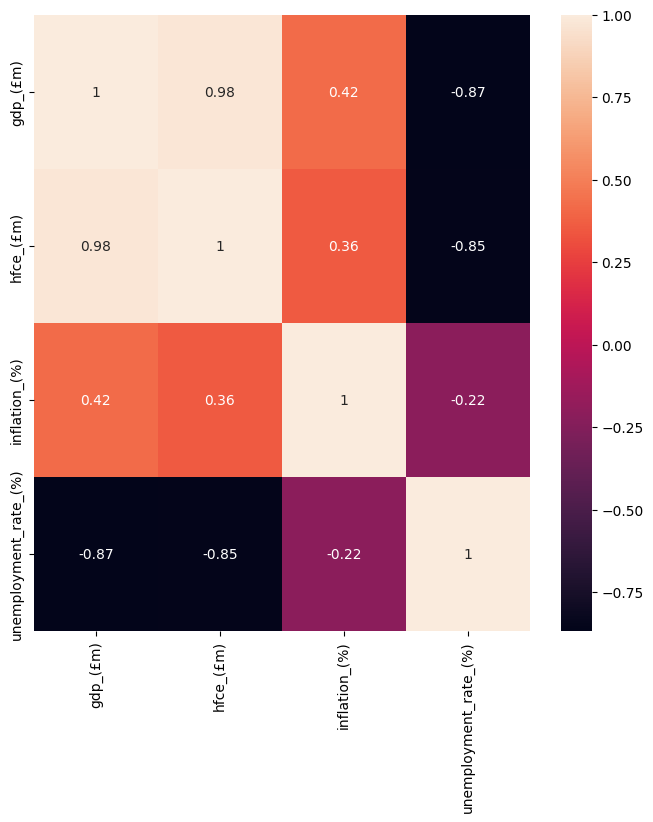

In [54]:
plt.figure(figsize=(8, 8))


k = 4  # number of variables for heatmap
cols = ons_data.corr().nlargest(k, 'gdp_(£m)')['gdp_(£m)'].index
cm = ons_data[cols].corr()

sns.heatmap(cm, annot=True)